# **IBM HR Analytics Employee Attrition & Performance**


Driven by the interest on how people experience attrition and performance at their jobs, a study on how different features influence these indicators.
This notebook contemplates different phases of a data science project including Exploratory Data Analysis, Data Modelling and Classification.


Data: 
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


## Environment setup

First of all, import the needed libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Exploratory Data Analysis (EDA)

### Initial data exploration

#### Data loading

In [2]:
df = pd.read_csv('data/IBM-HR.csv')

#### Dataframe values

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Statistical information of the dataframe

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Dataframe values for each column in dataframe

In [5]:
columns_list = df.columns.values.tolist()
for column in columns_list:
    print(column)
    print(df[column].unique())
    print('\n')

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  96

#### Drop of useless columns

After visualizing values of the dataframe, some columns are considered to be useless for the study.
- EmployeeCount -> Has a unique value [1]
- Over18 -> Has a unique value [Y]
- StandardHours -> Has a unique value [80]
- EmployeeNumber -> Has no meaning for an attrition study.

In [6]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True, axis=1)

#### Check for null values in the dataframe

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Dataframe visualization

#### Correlation matrix

Shows how much columns are related to each other

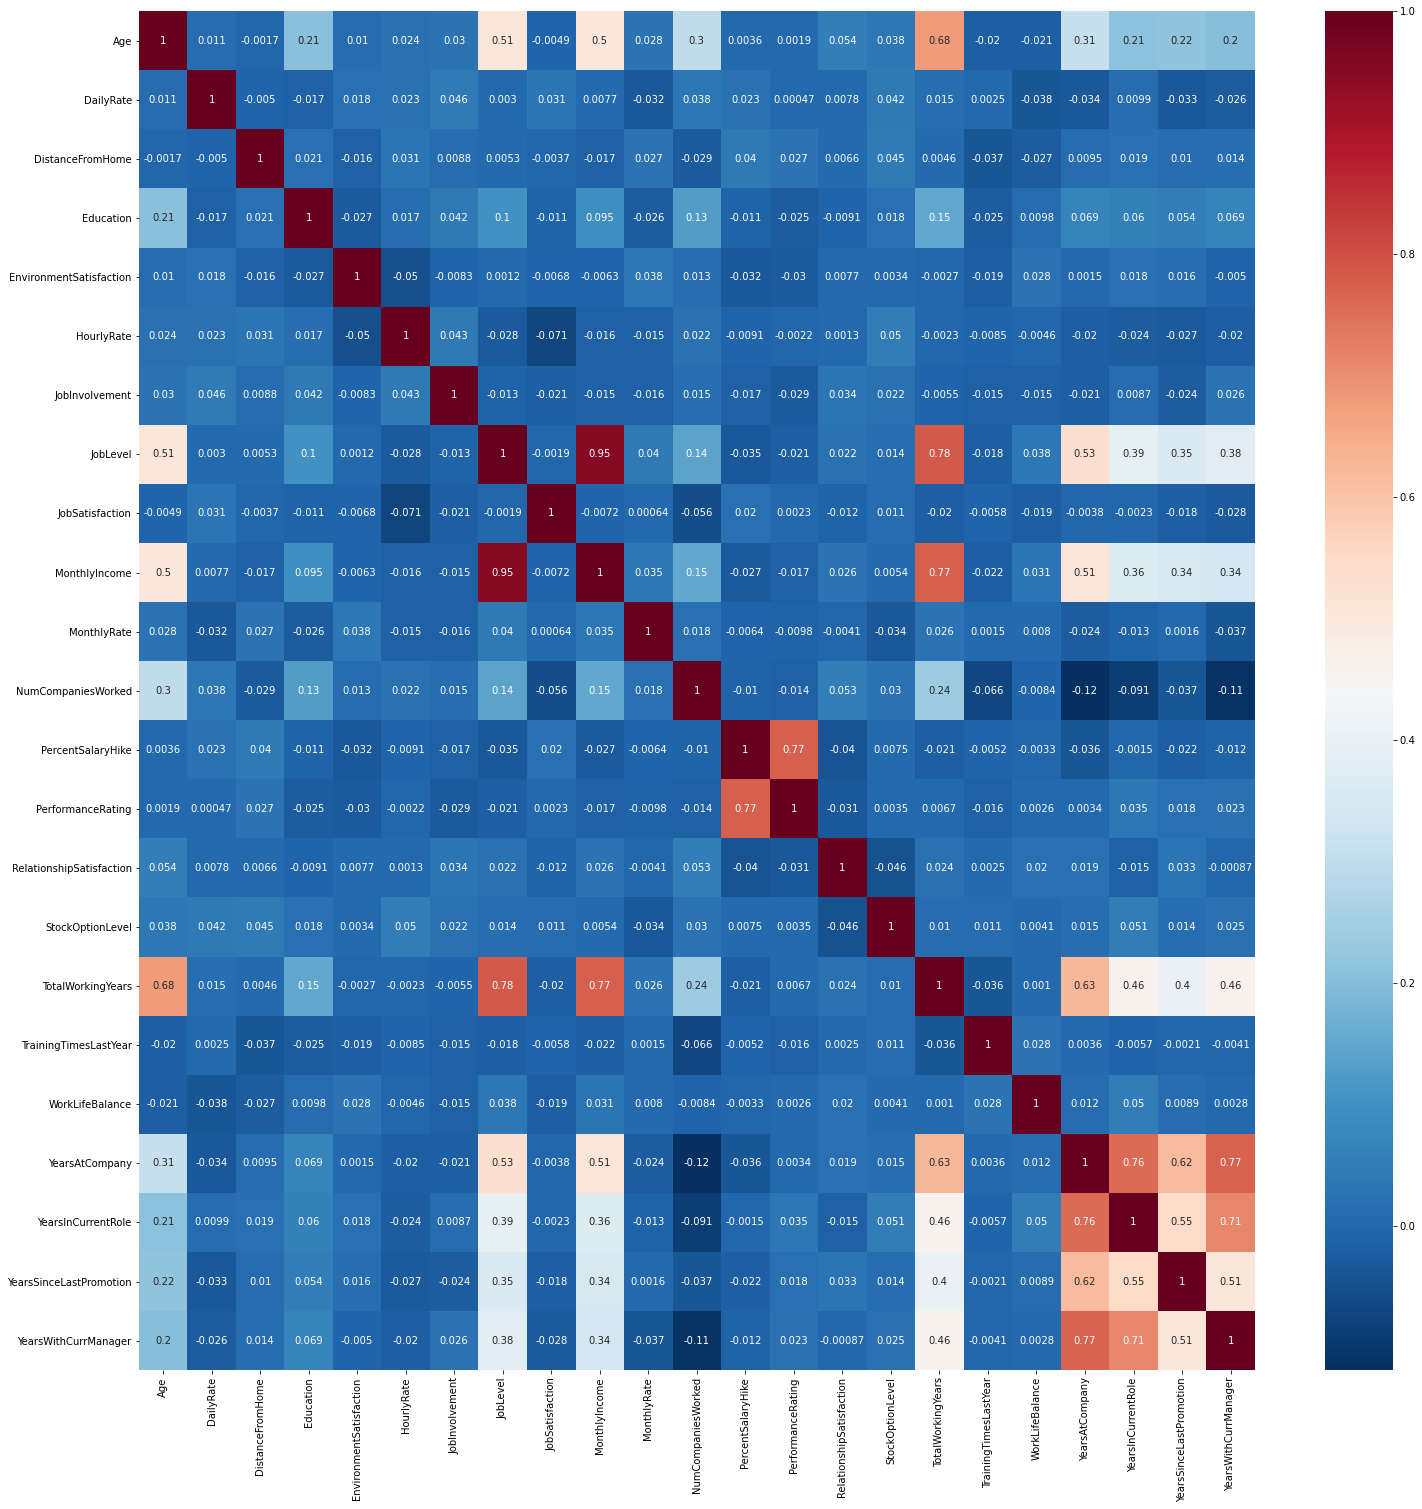

In [8]:
corrMatrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, cmap="RdBu_r")
plt.show()

#### Index creation based on column correlation

In [9]:
indices = np.where(corrMatrix > 0.2 )
indices = [(corrMatrix.index[x], corrMatrix.columns[y]) for x, y in zip(*indices) if x != y and x < y]

#### Index visualization

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


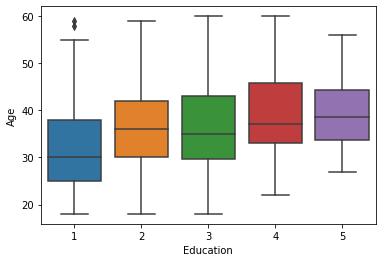

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


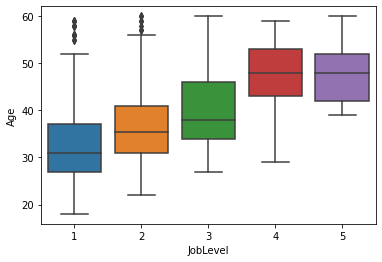

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


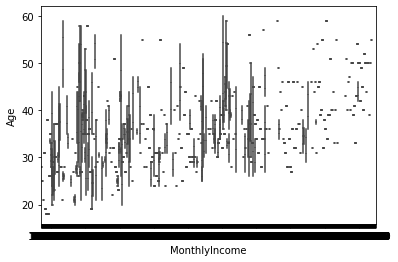

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


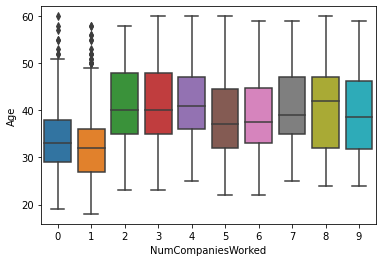

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


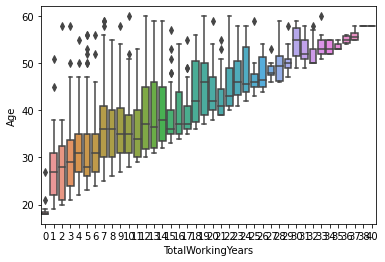

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


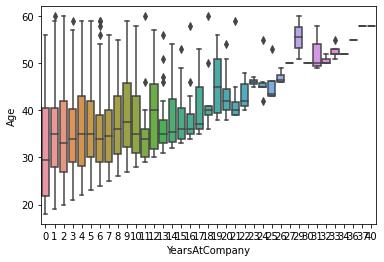

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


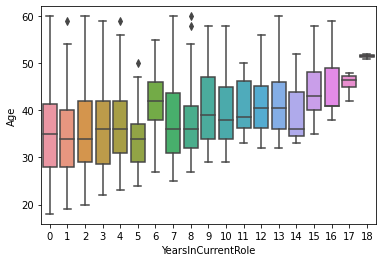

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


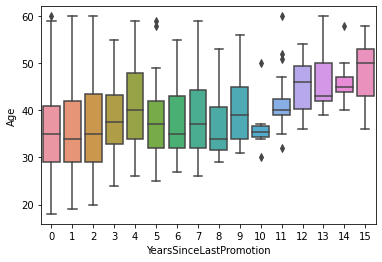

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


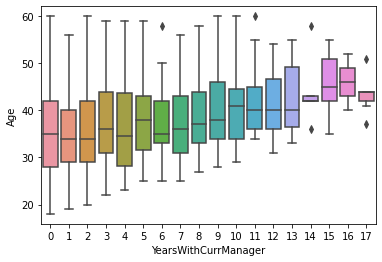

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


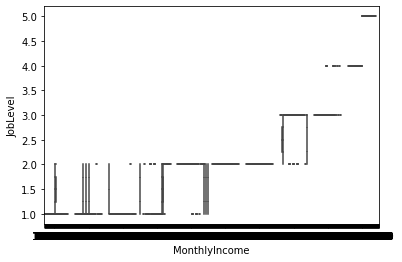

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


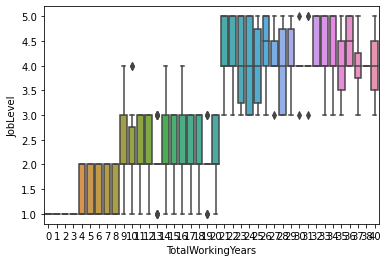

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


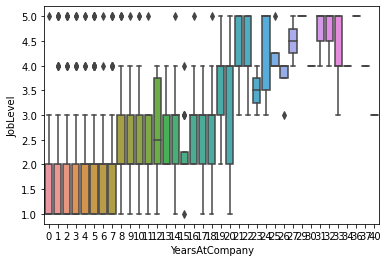

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


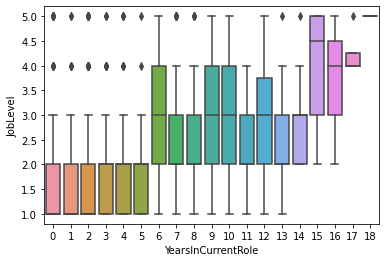

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


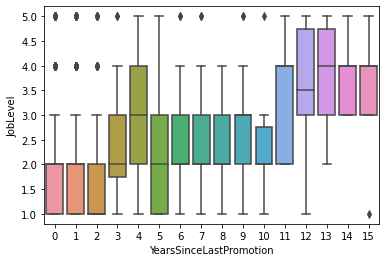

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


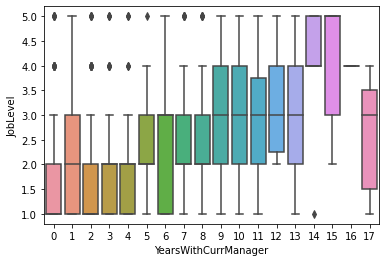

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


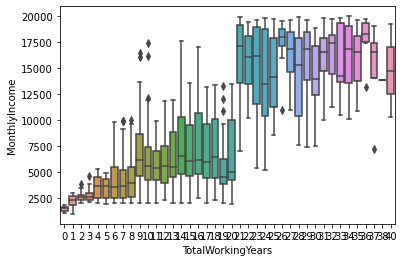

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


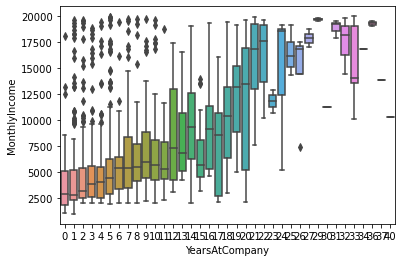

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


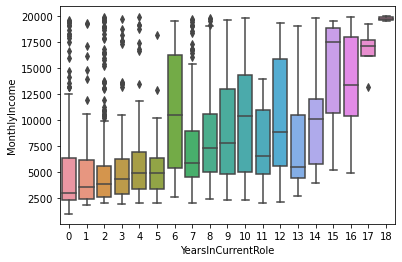

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


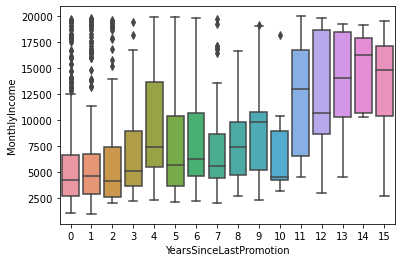

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


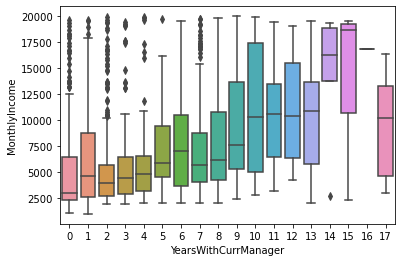

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


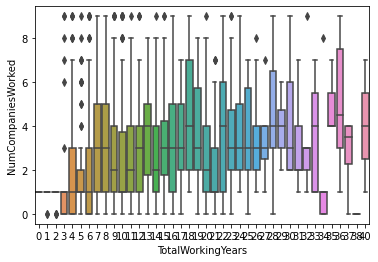

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


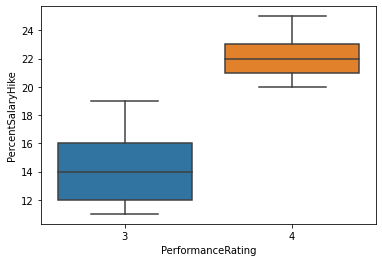

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


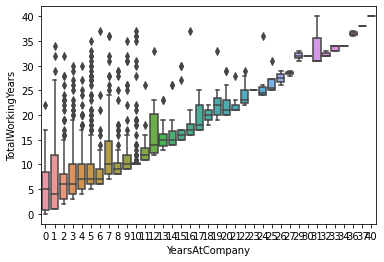

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


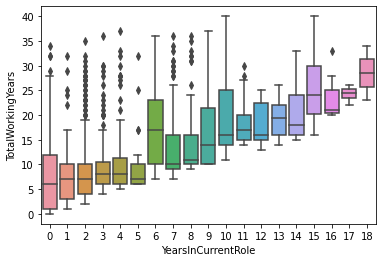

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


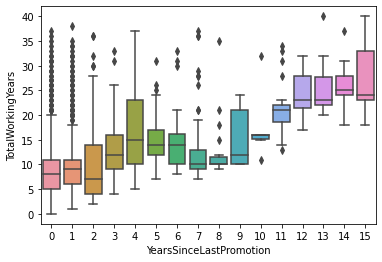

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


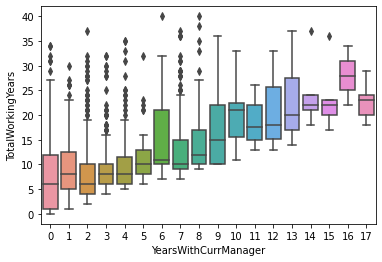

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


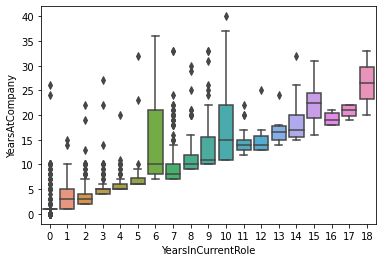

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


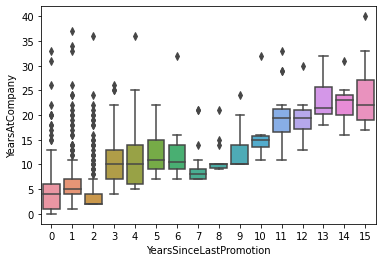

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


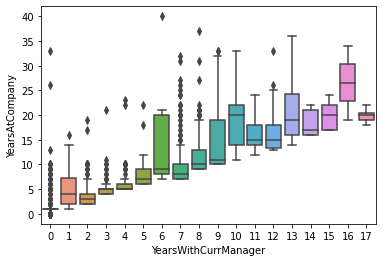

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


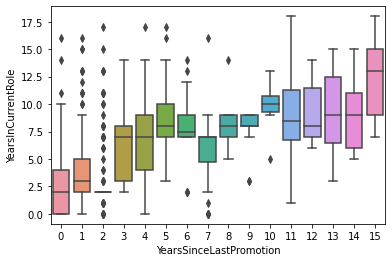

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


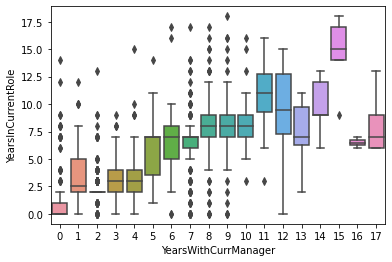

In [10]:
for i in range(len(indices) - 1):
    sns.boxplot(df[indices[i][1]], df[indices[i][0]])
    plt.show()

### Specific column correlation visualization

#### JobLevel -> TotalWorkingYears

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

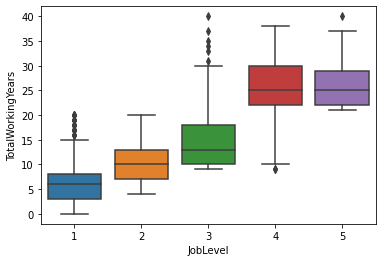

In [11]:
sns.boxplot(df['JobLevel'], df['TotalWorkingYears'])

#### Attrition -> YearsAtCompany

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

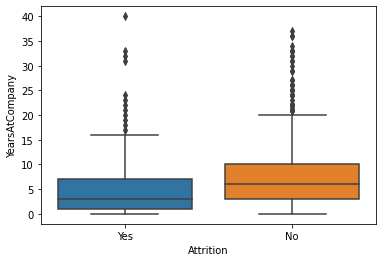

In [12]:
sns.boxplot(df['Attrition'], df['YearsAtCompany'])

#### Attrition -> MonthlyIncome

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

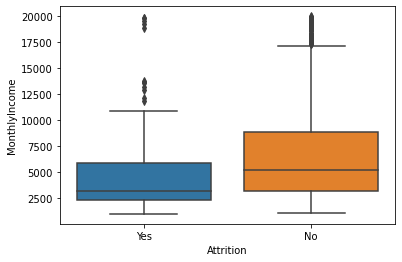

In [13]:
sns.boxplot(df['Attrition'], df['MonthlyIncome'])

#### PerformanceRating -> PercentSalaryHyke

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

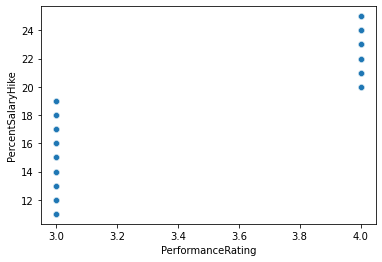

In [14]:
sns.scatterplot(df['PerformanceRating'], df['PercentSalaryHike'])

### Study of YearsAtCompany and Attrition

The objective of this anaylisis was to identify how attrition distritbution in employees vary in the dataframe regarding attrition distribution previous years.

#### Auxiliary dataframe creation with sorted data

In [15]:
sorted_by_YearsAtCompany_df = df.sort_values(by=['YearsAtCompany'], ascending=True)

#### Auxiliary grouped dataframe based on Attrition and YearsAtCompany

In [16]:
years_att = sorted_by_YearsAtCompany_df.groupby(['YearsAtCompany','Attrition'])

#### Group employees with same YearsAtCompany based on their Attrition and count them

In [17]:
sorted_by_YearsAtCompany_df.groupby(['YearsAtCompany','Attrition']).agg('count')

Age  BusinessTravel  DailyRate  Department  \
YearsAtCompany Attrition                                               
0              No          28              28         28          28   
               Yes         16              16         16          16   
1              No         112             112        112         112   
               Yes         59              59         59          59   
2              No         100             100        100         100   
...                       ...             ...        ...         ...   
33             Yes          1               1          1           1   
34             No           1               1          1           1   
36             No           2               2          2           2   
37             No           1               1          1           1   
40             Yes          1               1          1           1   

                          DistanceFromHome  Education  EducationField  \
YearsAtCompany Attrition                                                
0              No                       28         28              28   
               Yes                      16         16              16   
1              No                      112        112             112   
               Yes                      59         59              59   
2              No                      100        100             100   
...                                    ...        ...             ...   
33             Yes                       1          1               1   
34             No                        1          1               1   
36             No                        2          2               2   
37             No                        1          1               1   
40             Yes                       1          1               1   

                          EnvironmentSatisfaction  Gender  HourlyRate  ...  \
YearsAtCompany Attrition                                               ...   
0              No                              28      28          28  ...   
               Yes                             16      16          16  ...   
1              No                             112     112         112  ...   
               Yes                             59      59          59  ...   
2              No                             100     100         100  ...   
...                                           ...     ...         ...  ...   
33             Yes                              1       1           1  ...   
34             No                               1       1           1  ...   
36             No                               2       2           2  ...   
37             No                               1       1           1  ...   
40             Yes                              1       1           1  ...   

                          PercentSalaryHike  PerformanceRating  \
YearsAtCompany Attrition                                         
0              No                        28                 28   
               Yes                       16                 16   
1              No                       112                112   
               Yes                       59                 59   
2              No                       100                100   
...                                     ...                ...   
33             Yes                        1                  1   
34             No                         1                  1   
36             No                         2                  2   
37             No                         1                  1   
40             Yes                        1                  1   

                          RelationshipSatisfaction  StockOptionLevel  \
YearsAtCompany Attrition                                               
0              No                               28                28   
               Yes                              1

#### Visualize Attrition distribution based on YearsAtCompany

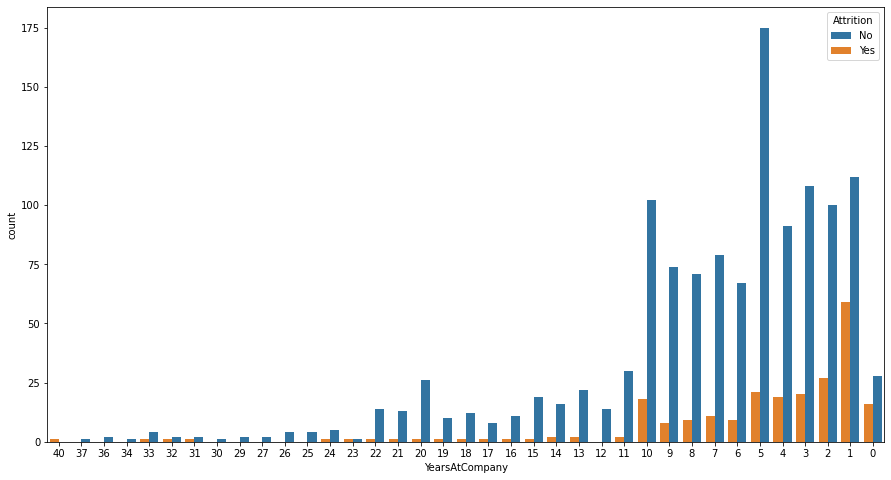

In [18]:
plt.figure(figsize=(15,8))
plot1 = sns.countplot(x="YearsAtCompany", hue='Attrition', data=sorted_by_YearsAtCompany_df)
plot1.invert_xaxis()
plt.show()

## Modelling

### Setting target column

#### Create target column for model prediction

In [19]:
first_y = df['Attrition']
first_X = df.drop('Attrition', axis=1)

#### Transform categorical variables to numerical variables (dummies)

In [20]:
first_X_dummies = pd.get_dummies(first_X)

#### Create train and test data based on dummies and target column

In [21]:
X_train, X_test, y_train, y_test = train_test_split(first_X_dummies, 
                                                    first_y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

#### Model performance comparing function

In order to get the best classifier model for our dataset, this function is defined 

In [35]:
from sklearn.metrics import accuracy_score, fbeta_score
from time import time
def train_predict(learner, X_train, y_train, X_test, y_test): 

    
    results = {}
    imp = {}
    
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    
    
    results['train_time'] = end - start
        
    
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() 
    
    results['learner'] = learner
    
    results['pred_time'] = end - start
            
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=1, pos_label='Yes')
        
    
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1, pos_label='Yes')
    
    
    #imp[learner.__class__.__name__] = list(zip(learner.feature_importances_, X_train.columns))
    
    print("{} trained.".format(learner.__class__.__name__))
        
    
    return results

#### Classifier declaration and comparing

In [37]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



clf_A = RandomForestClassifier(random_state=42)
clf_B = AdaBoostClassifier(random_state=42)
clf_C = GaussianNB()




results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name][0] = \
    train_predict(clf, X_train, y_train, X_test, y_test)
  
results = results
best = {}
for i, ii, in results.items():
    print(i)
    if not best:
        best = ii
    elif best[0]['acc_test'] < ii[0]['acc_test']:
        best = ii
best
# results

RandomForestClassifier trained.
AdaBoostClassifier trained.
GaussianNB trained.
RandomForestClassifier
AdaBoostClassifier
GaussianNB


{0: {'train_time': 0.7134890556335449,
  'learner': RandomForestClassifier(random_state=42),
  'pred_time': 0.10764241218566895,
  'acc_train': 1.0,
  'acc_test': 0.8775510204081632,
  'f_train': 1.0,
  'f_test': 0.21739130434782608}}

# asignación de clf automática

## Best Model selection

#### Assign best model after training

In [38]:
clf = best[0]['learner']

#### Model training with train data

In [39]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Prediction

In [40]:
y_values = clf.predict(X_test)

#### Show importances of columns in prediction

In [41]:
clf.feature_importances_

array([0.05237681, 0.0472603 , 0.04284728, 0.0185746 , 0.02231561,
       0.04345505, 0.02081692, 0.02471193, 0.02667839, 0.08027092,
       0.04063003, 0.03124571, 0.02867398, 0.00400285, 0.01986232,
       0.02760837, 0.04897027, 0.02292094, 0.02102337, 0.04108773,
       0.02866852, 0.02692108, 0.02803777, 0.00292796, 0.01164482,
       0.00655679, 0.00269502, 0.00861762, 0.00893508, 0.00160155,
       0.00712006, 0.00582372, 0.00950834, 0.00340426, 0.00717974,
       0.00823711, 0.00715146, 0.00251233, 0.00296732, 0.00878384,
       0.00157842, 0.00262949, 0.00084828, 0.00598418, 0.00767843,
       0.01123612, 0.00641745, 0.00789767, 0.02083566, 0.03857835,
       0.0416882 ])

#### Assign index based in importance

In [42]:
importances = clf.feature_importances_
indice = np.argsort(importances)
indice

array([42, 40, 29, 37, 41, 26, 23, 38, 33, 13, 31, 43, 46, 25, 30, 36, 34,
       44, 47, 35, 27, 39, 28, 32, 45, 24,  3, 14,  6, 48, 18,  4, 17,  7,
        8, 21, 15, 22, 20, 12, 11, 49, 10, 19, 50,  2,  5,  1, 16,  0,  9],
      dtype=int64)

#### Sort importances

In [43]:
importances = list(zip(clf.feature_importances_, X_train.columns))
importances.sort(reverse=True)

#### Importances list visualization

In [44]:
importances

[(0.08027092257749606, 'MonthlyIncome'),
 (0.052376806680057085, 'Age'),
 (0.048970266971447005, 'TotalWorkingYears'),
 (0.047260302429031495, 'DailyRate'),
 (0.04345505022513576, 'HourlyRate'),
 (0.04284727513089457, 'DistanceFromHome'),
 (0.0416882006173566, 'OverTime_Yes'),
 (0.04108772505816952, 'YearsAtCompany'),
 (0.04063002570655693, 'MonthlyRate'),
 (0.03857834638785391, 'OverTime_No'),
 (0.031245712213489932, 'NumCompaniesWorked'),
 (0.028673983413377572, 'PercentSalaryHike'),
 (0.028668520417522873, 'YearsInCurrentRole'),
 (0.02803776936745331, 'YearsWithCurrManager'),
 (0.027608374043593675, 'StockOptionLevel'),
 (0.026921080719944635, 'YearsSinceLastPromotion'),
 (0.026678388998380823, 'JobSatisfaction'),
 (0.024711930355169054, 'JobLevel'),
 (0.022920936066121018, 'TrainingTimesLastYear'),
 (0.022315607212084337, 'EnvironmentSatisfaction'),
 (0.021023371405565674, 'WorkLifeBalance'),
 (0.020835660880731122, 'MaritalStatus_Single'),
 (0.020816916282391372, 'JobInvolvement')

#### Show the 11 most important features in prediction

<AxesSubplot:>

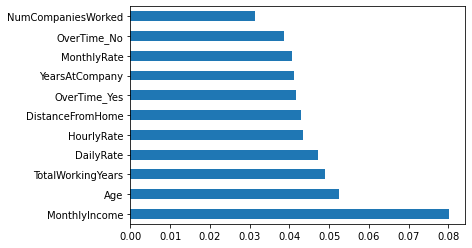

In [45]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


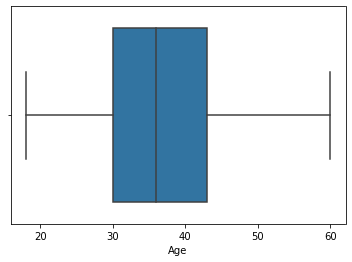

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

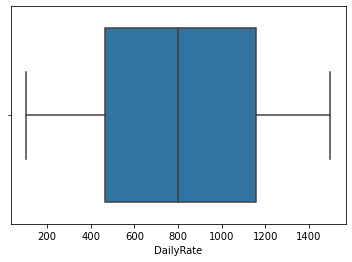

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


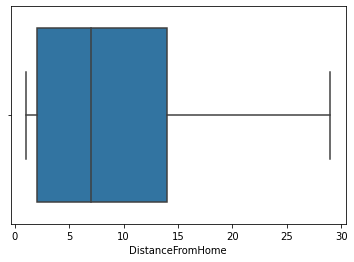

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


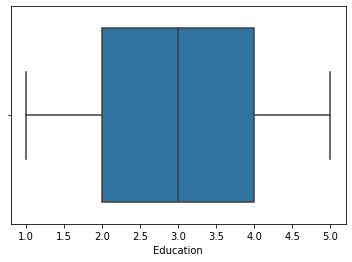

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


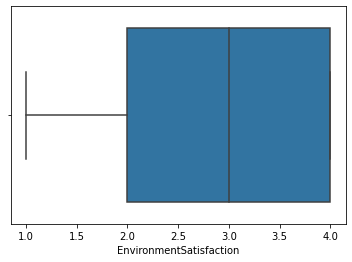

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


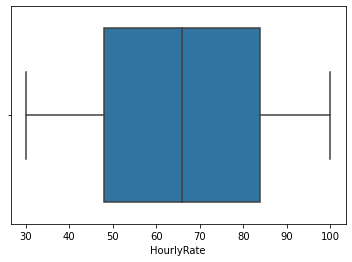

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


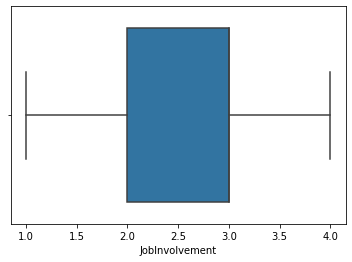

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


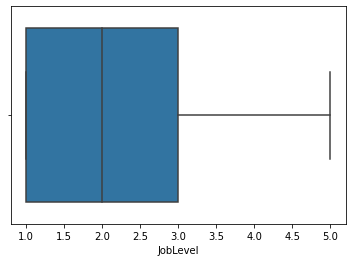

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


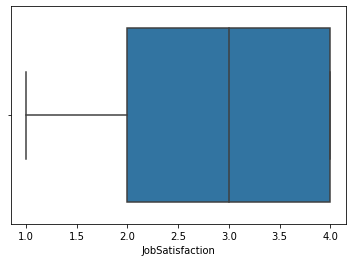

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


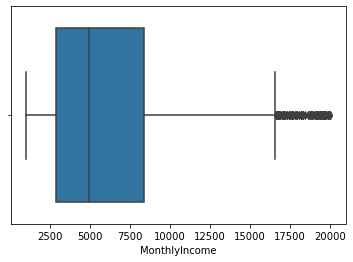

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


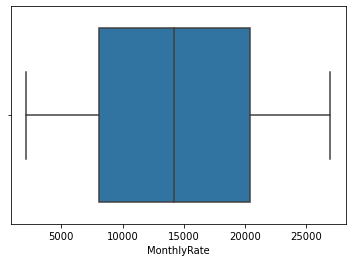

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


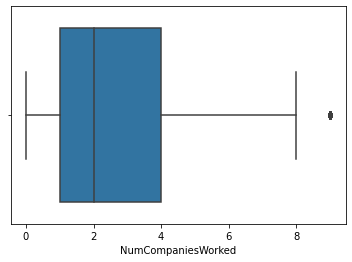

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


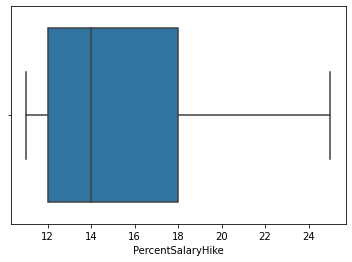

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


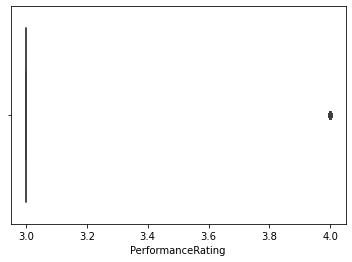

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


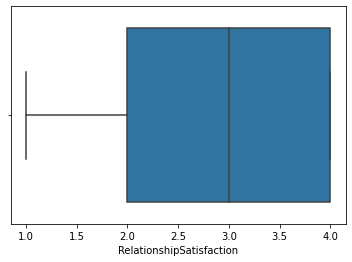

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


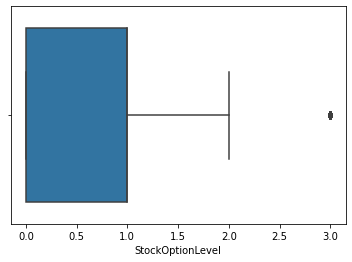

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


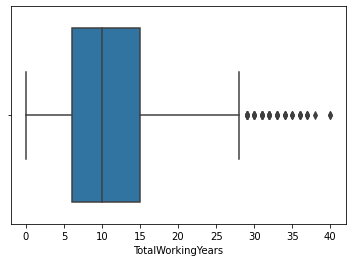

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


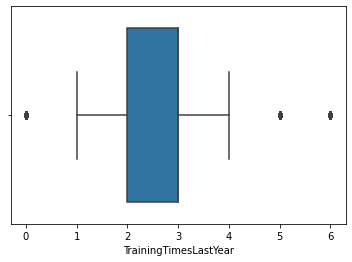

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


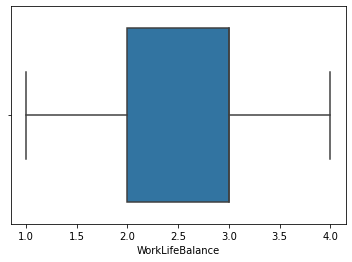

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


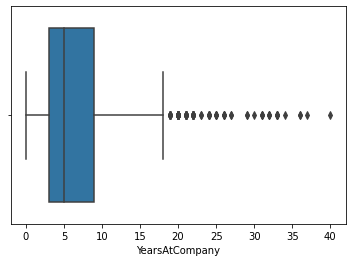

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


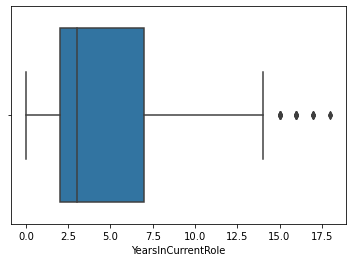

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


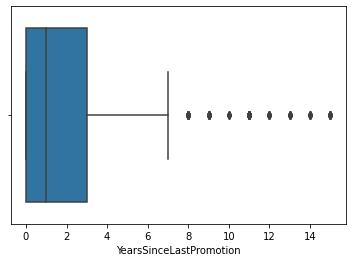

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


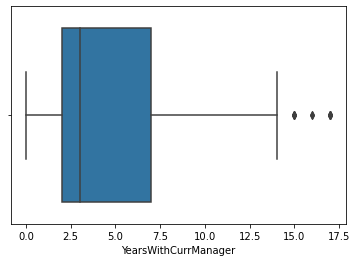

In [46]:
for column in df.columns:
    try:
        sns.boxplot(df[column])
        plt.show()
    except:
        pass

## Data augmentation

#### Apply augmentation with SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(first_X_dummies, first_y) 

print(f'''Shape of X before SMOTE: {first_X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1470, 30)
Shape of X after SMOTE: (2466, 51)

Balance of positive and negative classes (%):


No     50.0
Yes    50.0
Name: Attrition, dtype: float64

#### Create train and test data using augmented rows

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,
                                                    y_sm, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

#### Get shape of augmented train data

In [49]:
X_train.shape

(1972, 51)

#### Model fit

In [51]:
clf.fit(X_sm, y_sm)

RandomForestClassifier(random_state=42)

#### Model prediction

In [52]:
prob = clf.predict_proba(X_sm)[:,1]

#### Prediction visualization

(array([895., 308.,  30.,   0.,   0.,   1.,  24.,  77., 146., 985.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

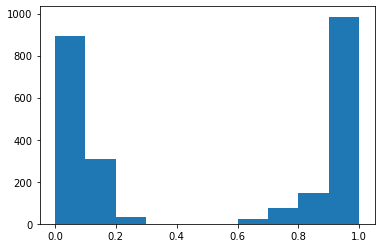

In [53]:
plt.hist(prob)

#### Assign augmented data to new variable

In [54]:
augmented_df = X_sm

#### Assign augmented data to target column

In [55]:
augmented_df['Attrition'] = y_sm

#### Precition target column visualization

In [56]:
augmented_df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2461    Yes
2462    Yes
2463    Yes
2464    Yes
2465    Yes
Name: Attrition, Length: 2466, dtype: object

#### Assign probability series to target column

In [57]:
augmented_df['Attrition'] = pd.Series(prob)

#### Target column visualization after probability assignment

In [58]:
augmented_df['Attrition']

0       0.79
1       0.02
2       0.91
3       0.13
4       0.08
        ... 
2461    0.97
2462    1.00
2463    0.99
2464    0.99
2465    0.93
Name: Attrition, Length: 2466, dtype: float64

#### Column visualization of augmented dataframe

In [59]:
augmented_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [60]:
augmented_df['Attrition']

0       0.79
1       0.02
2       0.91
3       0.13
4       0.08
        ... 
2461    0.97
2462    1.00
2463    0.99
2464    0.99
2465    0.93
Name: Attrition, Length: 2466, dtype: float64

## Modifications to data for target prediction

### Increase functions

In [61]:
def increase10Percent(x):
    return x * 1.1
def increase20Percent(x):
    return x * 1.2
def increase30Percent(x):
    return x * 1.3
def increase40Percent(x):
    return x * 1.4
def increase50Percent(x):
    return x * 1.5
def increase60Percent(x):
    return x * 1.6
def increase70Percent(x):
    return x * 1.7
def increase80Percent(x):
    return x * 1.8
def increase90Percent(x):
    return x * 1.9
def increase100Percent(x):
    return x * 2

### Column testing after modifications

#### MonthlyIncome del +10%

In [62]:
X_10PercentIncrease = X_train
X_10PercentIncrease['MonthlyIncome'] = X_10PercentIncrease['MonthlyIncome'].apply(increase10Percent)


<ipython-input-62-08ecafb44f15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_10PercentIncrease['MonthlyIncome'] = X_10PercentIncrease['MonthlyIncome'].apply(increase10Percent)


#### Probability  prediction

In [63]:
prob = clf.predict_proba(X_10PercentIncrease)[:,1]

#### Probability assignment to new column

In [64]:
augmented_df['Attrition_MonthlyIncome_10plus_prob'] = pd.Series(prob)

#### Column visualization

In [65]:
augmented_df['Attrition_MonthlyIncome_10plus_prob']

0       0.94
1       0.12
2       0.05
3       0.98
4       0.92
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_10plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +20%

In [66]:
X_20PercentIncrease = X_train
X_20PercentIncrease['MonthlyIncome'] = X_20PercentIncrease['MonthlyIncome'].apply(increase20Percent)


<ipython-input-66-69c6abbcad65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_20PercentIncrease['MonthlyIncome'] = X_20PercentIncrease['MonthlyIncome'].apply(increase20Percent)


#### Probability  prediction

In [67]:
prob = clf.predict_proba(X_20PercentIncrease)[:,1]

#### Probability assignment to new column

In [68]:
augmented_df['Attrition_MonthlyIncome_20plus_prob'] = pd.Series(prob)

#### Column visualization

In [69]:
augmented_df['Attrition_MonthlyIncome_20plus_prob']

0       0.86
1       0.12
2       0.05
3       0.92
4       0.91
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_20plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome +30%

In [70]:
X_30PercentIncrease = X_train
X_30PercentIncrease['MonthlyIncome'] = X_30PercentIncrease['MonthlyIncome'].apply(increase30Percent)


<ipython-input-70-57a2aceff736>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_30PercentIncrease['MonthlyIncome'] = X_30PercentIncrease['MonthlyIncome'].apply(increase30Percent)


#### Probability  prediction

In [71]:
prob = clf.predict_proba(X_30PercentIncrease)[:,1]

#### Probability assignment to new column

In [72]:
augmented_df['Attrition_MonthlyIncome_30plus_prob'] = pd.Series(prob)

#### Column visualization

In [73]:
augmented_df['Attrition_MonthlyIncome_30plus_prob']

0       0.84
1       0.12
2       0.05
3       0.88
4       0.91
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_30plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome +40%

In [74]:
X_40PercentIncrease = X_train
X_40PercentIncrease['MonthlyIncome'] = X_40PercentIncrease['MonthlyIncome'].apply(increase40Percent)


<ipython-input-74-51a25ad59071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_40PercentIncrease['MonthlyIncome'] = X_40PercentIncrease['MonthlyIncome'].apply(increase40Percent)


#### Probability  prediction

In [75]:
prob = clf.predict_proba(X_40PercentIncrease)[:,1]

#### Probability assignment to new column

In [76]:
augmented_df['Attrition_MonthlyIncome_40plus_prob'] = pd.Series(prob)

#### Column visualization

In [77]:
augmented_df['Attrition_MonthlyIncome_40plus_prob']

0       0.83
1       0.17
2       0.05
3       0.90
4       0.84
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_40plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +50%

In [78]:
X_50PercentIncrease = X_train
X_50PercentIncrease['MonthlyIncome'] = X_50PercentIncrease['MonthlyIncome'].apply(increase50Percent)


<ipython-input-78-14085df9c8dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_50PercentIncrease['MonthlyIncome'] = X_50PercentIncrease['MonthlyIncome'].apply(increase50Percent)


#### Probability  prediction

In [79]:
prob = clf.predict_proba(X_50PercentIncrease)[:,1]

#### Probability assignment to new column

In [80]:
augmented_df['Attrition_MonthlyIncome_50plus_prob'] = pd.Series(prob)

#### Column visualization

In [81]:
augmented_df['Attrition_MonthlyIncome_50plus_prob']

0       0.81
1       0.17
2       0.07
3       0.90
4       0.73
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_50plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +60%

In [82]:
X_60PercentIncrease = X_train
X_60PercentIncrease['MonthlyIncome'] = X_60PercentIncrease['MonthlyIncome'].apply(increase60Percent)


<ipython-input-82-01f433e79dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_60PercentIncrease['MonthlyIncome'] = X_60PercentIncrease['MonthlyIncome'].apply(increase60Percent)


#### Probability  prediction

In [83]:
prob = clf.predict_proba(X_60PercentIncrease)[:,1]

#### Probability assignment to new column

In [84]:
augmented_df['Attrition_MonthlyIncome_60plus_prob'] = pd.Series(prob)

#### Column visualization

In [85]:
augmented_df['Attrition_MonthlyIncome_60plus_prob']

0       0.79
1       0.17
2       0.06
3       0.90
4       0.75
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_60plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +70%

In [86]:
X_70PercentIncrease = X_train
X_70PercentIncrease['MonthlyIncome'] = X_70PercentIncrease['MonthlyIncome'].apply(increase70Percent)


<ipython-input-86-5a6def4875ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_70PercentIncrease['MonthlyIncome'] = X_70PercentIncrease['MonthlyIncome'].apply(increase70Percent)


#### Probability  prediction

In [87]:
prob = clf.predict_proba(X_70PercentIncrease)[:,1]

#### Probability assignment to new column

In [88]:
augmented_df['Attrition_MonthlyIncome_70plus_prob'] = pd.Series(prob)

#### Column visualization

In [89]:
augmented_df['Attrition_MonthlyIncome_70plus_prob']

0       0.82
1       0.17
2       0.10
3       0.90
4       0.75
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_70plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +80%

In [90]:
X_80PercentIncrease = X_train
X_80PercentIncrease['MonthlyIncome'] = X_80PercentIncrease['MonthlyIncome'].apply(increase80Percent)


<ipython-input-90-bb5b1f0ba671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_80PercentIncrease['MonthlyIncome'] = X_80PercentIncrease['MonthlyIncome'].apply(increase80Percent)


#### Probability  prediction

In [91]:
prob = clf.predict_proba(X_80PercentIncrease)[:,1]

#### Probability assignment to new column

In [92]:
augmented_df['Attrition_MonthlyIncome_80plus_prob'] = pd.Series(prob)

#### Column visualization

In [93]:
augmented_df['Attrition_MonthlyIncome_80plus_prob']

0       0.82
1       0.17
2       0.10
3       0.90
4       0.75
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_80plus_prob, Length: 2466, dtype: float64

#### MonthlyIncome del +90%

In [94]:
X_90PercentIncrease = X_train
X_90PercentIncrease['MonthlyIncome'] = X_90PercentIncrease['MonthlyIncome'].apply(increase90Percent)


<ipython-input-94-95f9ea15ece0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_90PercentIncrease['MonthlyIncome'] = X_90PercentIncrease['MonthlyIncome'].apply(increase90Percent)


#### Probability  prediction

In [95]:
prob = clf.predict_proba(X_90PercentIncrease)[:,1]

#### Probability assignment to new column

In [96]:
augmented_df['Attrition_MonthlyIncome_90plus_prob'] = pd.Series(prob)

#### Column visualization

In [97]:
augmented_df['Attrition_MonthlyIncome_90plus_prob']

0       0.82
1       0.17
2       0.10
3       0.90
4       0.75
        ... 
2461     NaN
2462     NaN
2463     NaN
2464     NaN
2465     NaN
Name: Attrition_MonthlyIncome_90plus_prob, Length: 2466, dtype: float64

## Visualización probabilidades (Increase MonthlyIncome)

#### 10% increase probability visualization

(array([673., 285.,  25.,   0.,   0.,   3.,  35.,  71., 128., 752.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

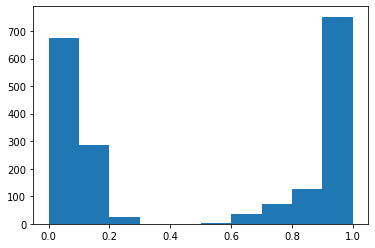

In [98]:
plt.hist(augmented_df['Attrition_MonthlyIncome_10plus_prob'])

#### 20% increase probability visualization

(array([638., 305.,  40.,   0.,   0.,   8.,  52.,  86., 188., 655.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

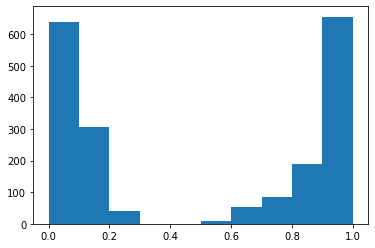

In [99]:
plt.hist(augmented_df['Attrition_MonthlyIncome_20plus_prob'])

#### 30% increase probability visualization

(array([590., 350.,  42.,   1.,   1.,  11.,  72., 105., 243., 557.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

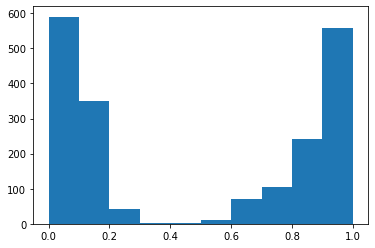

In [100]:
plt.hist(augmented_df['Attrition_MonthlyIncome_30plus_prob'])

#### 40% increase probability visualization

(array([561., 372.,  48.,   2.,   2.,  23.,  89., 110., 301., 464.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

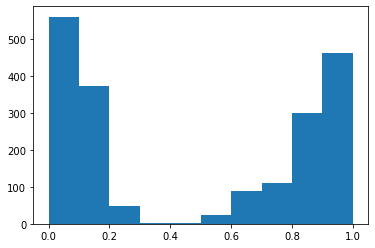

In [101]:
plt.hist(augmented_df['Attrition_MonthlyIncome_40plus_prob'])

#### 50% increase probability visualization

(array([528., 397.,  57.,   1.,   2.,  34.,  93., 135., 337., 388.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

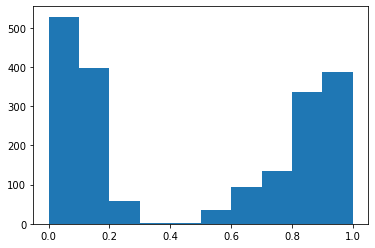

In [102]:
plt.hist(augmented_df['Attrition_MonthlyIncome_50plus_prob'])

#### 60% increase probability visualization

(array([493., 428.,  61.,   1.,   3.,  47.,  95., 167., 398., 279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

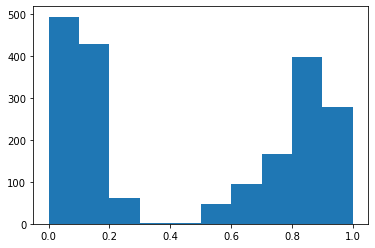

In [103]:
plt.hist(augmented_df['Attrition_MonthlyIncome_60plus_prob'])

#### 70% increase probability visualization

(array([461., 451.,  67.,   4.,   4.,  44., 104., 166., 454., 217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

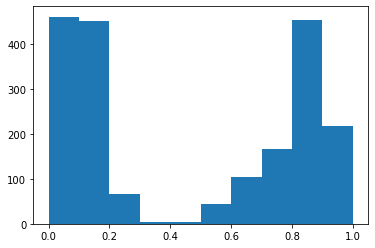

In [104]:
plt.hist(augmented_df['Attrition_MonthlyIncome_70plus_prob'])

#### 80% increase probability visualization

(array([461., 450.,  65.,   7.,   4.,  31.,  89., 173., 422., 270.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <BarContainer object of 10 artists>)

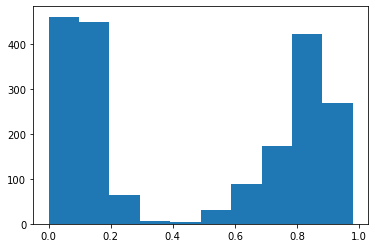

In [105]:
plt.hist(augmented_df['Attrition_MonthlyIncome_80plus_prob'])

#### 90% increase probability visualization

(array([461., 450.,  65.,   7.,   4.,  31.,  89., 172., 423., 270.]),
 array([0.   , 0.098, 0.196, 0.294, 0.392, 0.49 , 0.588, 0.686, 0.784,
        0.882, 0.98 ]),
 <BarContainer object of 10 artists>)

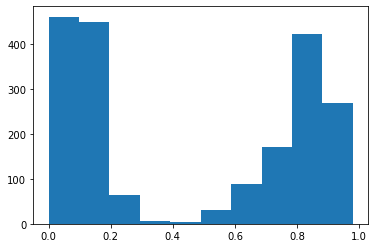

In [106]:
plt.hist(augmented_df['Attrition_MonthlyIncome_90plus_prob'])

## Change of approach
### Instead of applying changes to the whole dataset, changes are applied to dataset rows with attrition higher than 60%

#### Row with attrition to new dataframe

In [107]:
burnt_df = augmented_df[augmented_df['Attrition'] > 0.6]

#### Visualiztaion of first rows in new dataframe

In [108]:
burnt_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,Attrition,Attrition_MonthlyIncome_10plus_prob,Attrition_MonthlyIncome_20plus_prob,Attrition_MonthlyIncome_30plus_prob,Attrition_MonthlyIncome_40plus_prob,Attrition_MonthlyIncome_50plus_prob,Attrition_MonthlyIncome_60plus_prob,Attrition_MonthlyIncome_70plus_prob,Attrition_MonthlyIncome_80plus_prob,Attrition_MonthlyIncome_90plus_prob
0,41,1102,1,2,2,94,3,2,4,5993,...,0.79,0.94,0.86,0.84,0.83,0.81,0.79,0.82,0.82,0.82
2,37,1373,2,2,4,92,2,1,3,2090,...,0.91,0.05,0.05,0.05,0.05,0.07,0.06,0.10,0.10,0.10
14,28,103,24,3,3,50,2,1,3,2028,...,0.96,0.10,0.10,0.09,0.08,0.08,0.11,0.11,0.11,0.11
21,36,1218,9,4,3,82,2,1,1,3407,...,0.69,0.97,0.97,0.97,0.96,0.93,0.89,0.89,0.89,0.89
24,34,699,6,1,2,83,3,1,1,2960,...,0.65,0.80,0.80,0.77,0.69,0.72,0.72,0.72,0.72,0.72


#### Drop of useless columns

In [109]:
burnt_df.drop(['Attrition_MonthlyIncome_10plus_prob','Attrition_MonthlyIncome_20plus_prob','Attrition_MonthlyIncome_30plus_prob', 'Attrition_MonthlyIncome_40plus_prob', 'Attrition_MonthlyIncome_50plus_prob', 'Attrition_MonthlyIncome_60plus_prob', 'Attrition_MonthlyIncome_70plus_prob', 'Attrition_MonthlyIncome_80plus_prob', 'Attrition_MonthlyIncome_90plus_prob'], axis=1, inplace=True)

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Selection of target row

In [110]:
candidate_1 = burnt_df.iloc[2]

#### Target candidate attrition feature extraction

In [111]:
candidate_1_attrition = candidate_1['Attrition']

#### Target attrition visualization before modifications

In [112]:
candidate_1_attrition

0.96

#### Attrition target feature drop

In [113]:
candidate_1.drop('Attrition', inplace=True)

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\pandas\core\series.py:4443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Target candidate feature visualization

In [114]:
candidate_1

Age                                     28.0
DailyRate                              103.0
DistanceFromHome                        24.0
Education                                3.0
EnvironmentSatisfaction                  3.0
HourlyRate                              50.0
JobInvolvement                           2.0
JobLevel                                 1.0
JobSatisfaction                          3.0
MonthlyIncome                         2028.0
MonthlyRate                          12947.0
NumCompaniesWorked                       5.0
PercentSalaryHike                       14.0
PerformanceRating                        3.0
RelationshipSatisfaction                 2.0
StockOptionLevel                         0.0
TotalWorkingYears                        6.0
TrainingTimesLastYear                    4.0
WorkLifeBalance                          3.0
YearsAtCompany                           4.0
YearsInCurrentRole                       2.0
YearsSinceLastPromotion                  0.0
YearsWithC

#### 10% increase on MonthlyIncome

In [115]:
candidate_1['MonthlyIncome'] = candidate_1['MonthlyIncome'] * 1.1

<ipython-input-115-599a3c5eedd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_1['MonthlyIncome'] = candidate_1['MonthlyIncome'] * 1.1


#### Increment check

In [116]:
candidate_1['MonthlyIncome']

2230.8

#### OverTime feature modification

In [117]:
candidate_1['OverTime_No'] = 1

<ipython-input-117-d09cc2079699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_1['OverTime_No'] = 1


In [118]:
candidate_1['OverTime_Yes'] = 0

<ipython-input-118-534cd896aec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_1['OverTime_Yes'] = 0


#### Candidate row reshaping

In [119]:
candidate_1 = np.array(candidate_1).reshape(1,-1)

#### Probability prediction on target

In [120]:
prob_candidate_1 = clf.predict_proba(candidate_1)[:,1]

#### Probability visualization

In [121]:
prob_candidate_1

array([0.4])

#### Second target selection

In [122]:
candidate_2 = burnt_df.iloc[4]

#### Second target attrition feature extraction

In [123]:
candidate_2_attrition = candidate_2['Attrition']

#### Second target attrition visualization

In [124]:
candidate_2_attrition

0.65

#### Target column drop

In [125]:
candidate_2.drop('Attrition', inplace=True)

C:\Users\pabma\anaconda3\envs\saturdaysAI\lib\site-packages\pandas\core\series.py:4443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Candidate features visualization

In [126]:
candidate_2

Age                                     34.0
DailyRate                              699.0
DistanceFromHome                         6.0
Education                                1.0
EnvironmentSatisfaction                  2.0
HourlyRate                              83.0
JobInvolvement                           3.0
JobLevel                                 1.0
JobSatisfaction                          1.0
MonthlyIncome                         2960.0
MonthlyRate                          17102.0
NumCompaniesWorked                       2.0
PercentSalaryHike                       11.0
PerformanceRating                        3.0
RelationshipSatisfaction                 3.0
StockOptionLevel                         0.0
TotalWorkingYears                        8.0
TrainingTimesLastYear                    2.0
WorkLifeBalance                          3.0
YearsAtCompany                           4.0
YearsInCurrentRole                       2.0
YearsSinceLastPromotion                  1.0
YearsWithC

#### Second target modification on MonthlyIncome feature

In [127]:
candidate_2['MonthlyIncome'] = candidate_2['MonthlyIncome'] * 1.1

<ipython-input-127-a8575e23e43f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_2['MonthlyIncome'] = candidate_2['MonthlyIncome'] * 1.1


#### StockOptionLevel modification on second target

In [128]:
candidate_2['StockOptionLevel'] = 2

<ipython-input-128-3b651f4a2a53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_2['StockOptionLevel'] = 2


#### Target row reshaping

In [129]:
candidate_2 = np.array(candidate_2).reshape(1,-1)

#### Probability prediction after modifications 

In [130]:
prob_candidate_2 = clf.predict_proba(candidate_2)[:,1]

#### Probability check

In [131]:
prob_candidate_2

array([0.46])